In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance


In [2]:
data = pd.read_csv("env/6/acc_pca")

In [3]:
len(data)

24300

In [218]:
data.rename(columns = {"0":"pca"},inplace=True)

In [219]:
sample = np.arange(1,len(data)+1)

In [220]:
sample

array([    1,     2,     3, ..., 22918, 22919, 22920])

In [221]:
data["sample"] = sample

In [222]:
data = data[["time","sample","pca"]]

In [223]:
data

,time,sample,pca
0,2019-05-01 17:09:30.002,1,15.711148
1,2019-05-01 17:09:30.012,2,15.444676
2,2019-05-01 17:09:30.022,3,14.954455
3,2019-05-01 17:09:30.032,4,14.522117
4,2019-05-01 17:09:30.042,5,14.225403
5,2019-05-01 17:09:30.052,6,14.126150
6,2019-05-01 17:09:30.062,7,13.984448
7,2019-05-01 17:09:30.072,8,13.745804
8,2019-05-01 17:09:30.082,9,13.582814
9,2019-05-01 17:09:30.092,10,13.358051


In [224]:
data.set_index("time")

,sample,pca
time,,
2019-05-01 17:09:30.002,1,15.711148
2019-05-01 17:09:30.012,2,15.444676
2019-05-01 17:09:30.022,3,14.954455
2019-05-01 17:09:30.032,4,14.522117
2019-05-01 17:09:30.042,5,14.225403
2019-05-01 17:09:30.052,6,14.126150
2019-05-01 17:09:30.062,7,13.984448
2019-05-01 17:09:30.072,8,13.745804
2019-05-01 17:09:30.082,9,13.582814


In [225]:
data["time"] = pd.to_datetime(data["time"],format = '%Y-%m-%d %H:%M:%S.%f')

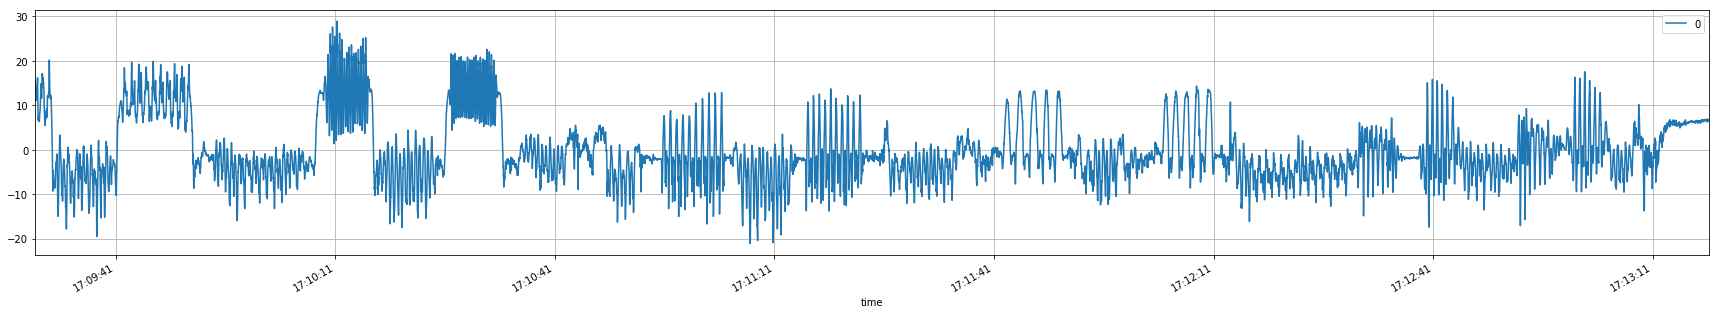

In [226]:
pd.DataFrame(data["pca"].values,index = data["time"]).plot(figsize = (30,5),grid=1)

In [231]:
labels = []
count = 0
while len(labels)<=len(data):
    if count == 0:
        left = datetime.strptime("2019-05-01 17:09:30.002",'%Y-%m-%d %H:%M:%S.%f')
    print "Please input the timestamp"
    timestamp = raw_input("Timestamp ") 
    right = min(data["time"], key=lambda x:abs(x-datetime.strptime(timestamp,'%Y-%m-%d %H:%M:%S.%f'))) #find the closest timestamp in acc2 to acc_w[0]
    
    mask = (data['time'] > left) & (data['time'] <= right)
    seg = data.loc[mask]
    
    print "Please input the location"
    location = raw_input("Location ") 
    if location == "":
        print "Try again!"
        break
    labels.extend(np.full(len(seg),location))
    
    left = right
    
    count = count + 1

Please input the timestamp
Timestamp 2019-05-01 17:10:03.757
Please input the location
Location bed
Please input the timestamp
Timestamp 2019-05-01 17:10:38.232
Please input the location
Location bat
Please input the timestamp
Timestamp 2019-05-01 17:11:29.773
Please input the location
Location kit
Please input the timestamp
Timestamp 2019-05-01 17:12:18.925
Please input the location
Location din
Please input the timestamp
Timestamp 2019-05-01 17:13:18.716
Please input the location
Location str
Please input the timestamp
Timestamp 


ValueError: time data '' does not match format '%Y-%m-%d %H:%M:%S.%f'

In [232]:
print len(labels)
df_labels = pd.DataFrame(labels)

22919


In [233]:
#df_labels.to_csv("env/5/labels")